train loss:2.310182699390678
=== epoch:1, train acc:0.09, test acc:0.0945 ===
train loss:2.3224134874105014
train loss:2.2946261577966043
train loss:2.293635497361706
=== epoch:2, train acc:0.11, test acc:0.101 ===
train loss:2.305735829755833
train loss:2.315274374402536
train loss:2.3094978502958914
=== epoch:3, train acc:0.11333333333333333, test acc:0.1042 ===
train loss:2.3134905765402127
train loss:2.306211852322267
train loss:2.306688049388488
=== epoch:4, train acc:0.12, test acc:0.1075 ===
train loss:2.30252804694548
train loss:2.2956402538574205
train loss:2.3202384419754667
=== epoch:5, train acc:0.12, test acc:0.1097 ===
train loss:2.3174319268682306
train loss:2.3208146900556517
train loss:2.3036047216552915
=== epoch:6, train acc:0.12, test acc:0.1136 ===
train loss:2.300230722108966
train loss:2.3013473141914504
train loss:2.312010434510409
=== epoch:7, train acc:0.13333333333333333, test acc:0.1202 ===
train loss:2.2941928707158836
train loss:2.3034687513721277
train lo

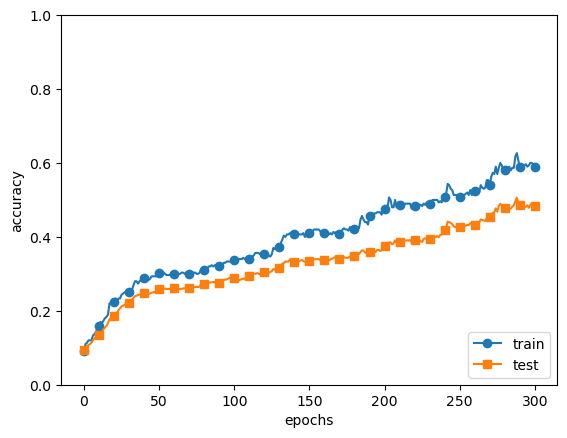

In [2]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


epoch:0, train acc:0.06, test acc:0.0765
epoch:1, train acc:0.07, test acc:0.0896
epoch:2, train acc:0.12666666666666668, test acc:0.1219
epoch:3, train acc:0.17333333333333334, test acc:0.1523
epoch:4, train acc:0.20333333333333334, test acc:0.166
epoch:5, train acc:0.21333333333333335, test acc:0.1743
epoch:6, train acc:0.22333333333333333, test acc:0.1841
epoch:7, train acc:0.22, test acc:0.1868
epoch:8, train acc:0.22666666666666666, test acc:0.1949
epoch:9, train acc:0.24666666666666667, test acc:0.2015
epoch:10, train acc:0.26, test acc:0.2137
epoch:11, train acc:0.2833333333333333, test acc:0.2228
epoch:12, train acc:0.31666666666666665, test acc:0.2312
epoch:13, train acc:0.32666666666666666, test acc:0.2416
epoch:14, train acc:0.34, test acc:0.2434
epoch:15, train acc:0.36, test acc:0.2714
epoch:16, train acc:0.38333333333333336, test acc:0.2833
epoch:17, train acc:0.41, test acc:0.306
epoch:18, train acc:0.3933333333333333, test acc:0.294
epoch:19, train acc:0.436666666666666

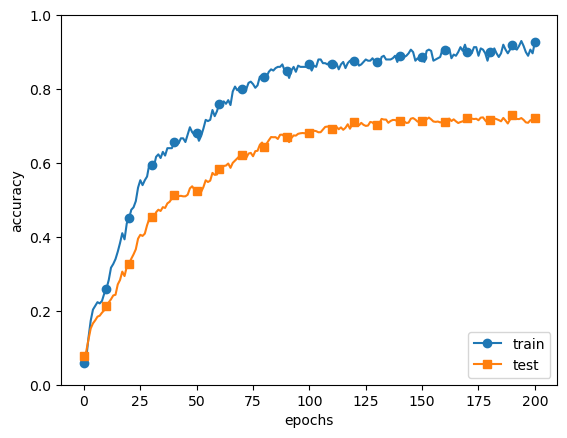

In [3]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
